# Supervised vs Unsupervised Learning

Main difference between supervised and unsupervised learning is labeled data points which is called a target (response) variable. Supervised learning starts with labeled data and trains the model accordingly. At the end, newcoming data points are labeled with the predictions of the model. Prominent examples are **regression** and **classification**. Unsupervised learning starts with unlabeled data and operates with respect to a task such as **dimensionality reduction**, **clustering**, **density estimation** etc.

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import manifold

# Figure styles
sns.set_theme(rc={"figure.figsize": (6, 6)})

DATA_DIR = "data"
DATASET_NAME = "mnist_train.csv"

data_directory = os.path.join(DATA_DIR, DATASET_NAME)

if os.path.exists(data_directory):
    print(data_directory)
else:
    print("Dataset is not found")


data/mnist_train.csv


Book uses `fetch_openml` method of scikit-learn library which returns a `bunch` if `return_X_y` argument is not passed. But here we use csv file provided in the datasets link from kaggle.

In [4]:
df = pd.read_csv(data_directory)
print(df.values) # label is the first column

[[5 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [5 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]]


Now, we turn dataframe into numpy arrays. Data points in this case digits are placed at the rows. So single row values represents an example of a digit. Reshaping row into 28 x 28 produces an image.

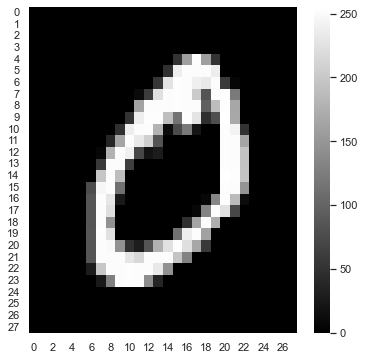

In [5]:
X, y = df.drop("label", axis=1).values, df["label"].values
x1 = X[1,:].reshape(28,28)
sns.set()
sns.heatmap(x1, cmap="gray")
plt.show()

## Dimensionality reduction with t-SNE

Instead of using all the pixels, we can reduce the dimensions of data points to a more manageable size such as 2. This is in a sense called *embedding* the data in lower manifold. The method used here is [t-distributed Stochastic Neighbor Embedding](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding). Only first 3000 data points are used. 

In [15]:
tsne_2d = manifold.TSNE(n_components=2, random_state=42)
X_transformed = tsne_2d.fit_transform(X[:3000, :])
y_transformed = y[:3000]

Now, we can visualize transformed data in 2D.

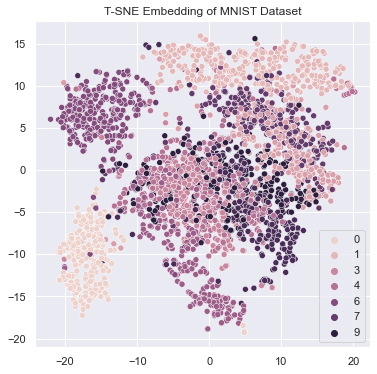

In [13]:
sns.scatterplot(X_transformed[:,0], X_transformed[:,1], hue=y_transformed)
plt.title("T-SNE Embedding of MNIST Dataset")
plt.show()

Moving on, 2D visualization looks cluttered. Also, 9s and 4s appear intertwined. So let's try to visualize the given data in 3D to differentiate between overlapping classes.

In [14]:
tsne_3d = manifold.TSNE(n_components=3, random_state=42)
X_transformed = tsne_3d.fit_transform(X[:3000,:])

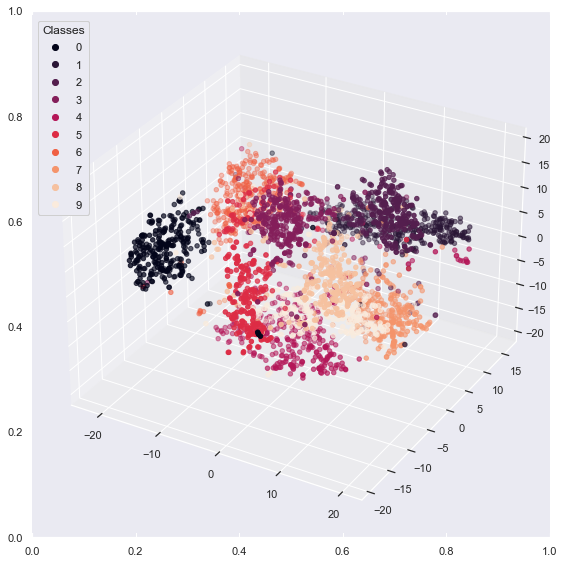

In [7]:
# 3D Scatter figure code

from mpl_toolkits.mplot3d import Axes3D
fig_3d, ax_3d = plt.subplots(figsize=(8,8))
fig_3d.tight_layout()

ax_3d = fig_3d.add_subplot(111, projection = '3d')

scatter_3d = ax_3d.scatter(X_transformed[:,0], X_transformed[:,1], X_transformed[:,2], c=y_transformed)

legend_3d = ax_3d.legend(*scatter_3d.legend_elements(),
                    loc="upper left", title="Classes")
ax_3d.add_artist(legend_3d)
plt.show()

It is clear from 3D visualization that we can fairly differentiate digits from each other clearly than 2D visualization. However, t-SNE method might find clusters when there is none. Additionly, this method does not preserve distance and density. Therefore, it is advisable to be alert regarding the assumptions about the dataset. For more information, check [cross validated](https://stats.stackexchange.com/questions/263539/clustering-on-the-output-of-t-sne/264647#264647).
 </div>